In [1]:
import sys
print(sys.version)
%pwd
#git clone https://github.com/fastai/fastai.git
#cd fastai
#conda env update
#conda activate fastai

3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]


'C:\\Users\\chrun\\fastai\\courses\\dl1\\Own\\Deep Learning\\structured data\\House Prices'

In [2]:
!pip install fastai
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.structured import *
from fastai.column_data import *

C:\Users\chrun\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#!pip install kaggle

#from googleapiclient.discovery import build
#import io, os
#from googleapiclient.http import MediaIoBaseDownload
#from google.colab import auth
#auth.authenticate_user()

#!mkdir -p ~/.kaggle
#!mv kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

#!mkdir data

In [4]:
#!kaggle competitions download -c house-prices-advanced-regression-techniques --force

In [5]:
#!mv sample_submission.csv data
#!mv data_description.txt data
#!mv test.csv data
#!mv train.csv data

In [6]:
#!rm -rf sample_submission.csv.gz
#!rm -rf test.csv.gz
#!rm -rf train.csv.gz

In [7]:
PATH = 'data/'

In [8]:
pd.read_csv(PATH + 'sample_submission.csv').head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [9]:
from IPython.display import HTML, display
table_names = ['test', 'train']
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

for t in tables: display(t.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
test, train = tables

In [11]:
len(train),len(test)

(1460, 1459)

In [12]:
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [13]:
train.head().T.head(82)

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [14]:
test.head().T.head(82)

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80,81,74,78,43
LotArea,11622,14267,13830,9978,5005
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,IR1,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,HLS
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [15]:
test['SalePrice'] = 0

In [16]:
len(train.columns), len(test.columns)

(81, 81)

In [17]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
train['YearRemodDiff'] = train['YearBuilt'] - train['YearRemodAdd']
test['YearRemodDiff'] = test['YearBuilt'] - test['YearRemodAdd']
train['SoldDate'] = pd.to_datetime(train['YrSold'].astype(str) + train['MoSold'].astype(str), format='%Y%m')
test['SoldDate'] = pd.to_datetime(test['YrSold'].astype(str) + test['MoSold'].astype(str), format='%Y%m')
add_datepart(train, "SoldDate", drop=False)
add_datepart(test, "SoldDate", drop=False)

In [19]:
train.drop(train['Id'][train['GrLivArea'] >= 4000], inplace = True)

In [20]:
train.drop('Utilities', 1, inplace = True)
test.drop('Utilities', 1, inplace = True)

In [21]:
#train[train.isnull().sum() > 0]
train.isnull().sum()

Id                         0
MSSubClass                 0
MSZoning                   0
LotFrontage              259
LotArea                    0
Street                     0
Alley                   1366
LotShape                   0
LandContour                0
LotConfig                  0
LandSlope                  0
Neighborhood               0
Condition1                 0
Condition2                 0
BldgType                   0
HouseStyle                 0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
RoofStyle                  0
RoofMatl                   0
Exterior1st                0
Exterior2nd                0
MasVnrType                 8
MasVnrArea                 8
ExterQual                  0
ExterCond                  0
Foundation                 0
BsmtQual                  37
                        ... 
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
3SsnPorch     

In [22]:
#pd.set_option('display.max_rows', 120)
train.T.head(200)

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50,...,60,78,35,90,62,62,85,66,68,75
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Pave,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,FR2,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside


In [23]:
cat_vars = ['MSSubClass', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'MoSold', 'YrSold', 'YearRemodDiff', 'YearBuilt', 'GarageYrBlt',
       'Fireplaces', 'YearRemodAdd', 'GarageCars', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',]

contin_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
               'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
               'LowQualFinSF', 'GrLivArea',  'GarageArea', 
               'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

n = len(train); n

1456

In [24]:
dep = 'SalePrice'
train_df = train[cat_vars + contin_vars + [dep, 'SoldDate']].copy()

In [25]:
test[dep] = 0
test_df = test[cat_vars + contin_vars + [dep, 'SoldDate', 'Id']].copy()

In [26]:
train_df.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,SoldDate
0,60,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,548,0,61,0,0,0,0,0,208500,2008-02-01
1,20,RL,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,460,298,0,0,0,0,0,0,181500,2007-05-01
2,60,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,608,0,42,0,0,0,0,0,223500,2008-09-01
3,70,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,642,0,35,272,0,0,0,0,140000,2006-02-01
4,60,RL,Pave,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,836,192,84,0,0,0,0,0,250000,2008-12-01


In [27]:
test_df.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,SoldDate,Id
0,20,RH,Pave,NaN,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,140,0,0,0,120,0,0,0,2010-06-01,1461
1,20,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,393,36,0,0,0,0,12500,0,2010-06-01,1462
2,60,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,212,34,0,0,0,0,0,0,2010-03-01,1463
3,60,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,360,36,0,0,0,0,0,0,2010-06-01,1464
4,120,RL,Pave,NaN,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,0,82,0,0,144,0,0,0,2010-01-01,1465


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
MSSubClass       1456 non-null int64
MSZoning         1456 non-null object
Street           1456 non-null object
Alley            90 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-null object
Exterior2nd      1456 non-null object
MasVnrType       1448 non-null object
ExterQual        1456 non-null object
ExterCond        1456 non-null object
Foundation       1456 non-null object
BsmtQual         1419 no

In [29]:
#for v in cat_vars: train_df[v] = train_df[v].fillna(-999).astype('category').cat.as_ordered()
#for v in cat_vars: test_df[v] = test_df[v].fillna(-999).astype('category').cat.as_ordered()

for v in cat_vars: train_df[v] = train_df[v].astype('category').cat.as_ordered()
apply_cats(test_df, train_df)

In [30]:
!pip install scikit-learn
from sklearn.preprocessing import Imputer

In [31]:
imputer = Imputer()
#values = train_df[contin_vars].values
train_df[contin_vars] = imputer.fit_transform(train_df[contin_vars])
#values = test_df[contin_vars].values
test_df[contin_vars] = imputer.fit_transform(test_df[contin_vars])

for v in contin_vars:
    train_df[v] = train_df[v].astype('float32')
    test_df[v] = test_df[v].astype('float32')
    
train_df[dep] = train_df[dep].astype('float32')
test_df[dep] = test_df[dep].astype('float32')

In [32]:
test_df.isnull().any()

MSSubClass        True
MSZoning          True
Street           False
Alley             True
LotShape         False
LandContour      False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
RoofStyle        False
RoofMatl         False
Exterior1st       True
Exterior2nd       True
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
                 ...  
GarageCars        True
BsmtFullBath      True
BsmtHalfBath      True
FullBath          True
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd      True
LotFrontage      False
LotArea          False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2 

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
MSSubClass       1456 non-null category
MSZoning         1456 non-null category
Street           1456 non-null category
Alley            90 non-null category
LotShape         1456 non-null category
LandContour      1456 non-null category
LotConfig        1456 non-null category
LandSlope        1456 non-null category
Neighborhood     1456 non-null category
Condition1       1456 non-null category
Condition2       1456 non-null category
BldgType         1456 non-null category
HouseStyle       1456 non-null category
OverallQual      1456 non-null category
OverallCond      1456 non-null category
RoofStyle        1456 non-null category
RoofMatl         1456 non-null category
Exterior1st      1456 non-null category
Exterior2nd      1456 non-null category
MasVnrType       1448 non-null category
ExterQual        1456 non-null category
ExterCond        1456 non-null category
Foundation     

In [34]:
train_indexed = train_df.set_index("SoldDate")

In [35]:
df, y, nas, mapper = proc_df(train_indexed, 'SalePrice', do_scale=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1456 entries, 2008-02-01 to 2008-06-01
Data columns (total 79 columns):
MSSubClass       1456 non-null int8
MSZoning         1456 non-null int8
Street           1456 non-null int8
Alley            1456 non-null int8
LotShape         1456 non-null int8
LandContour      1456 non-null int8
LotConfig        1456 non-null int8
LandSlope        1456 non-null int8
Neighborhood     1456 non-null int8
Condition1       1456 non-null int8
Condition2       1456 non-null int8
BldgType         1456 non-null int8
HouseStyle       1456 non-null int8
OverallQual      1456 non-null int8
OverallCond      1456 non-null int8
RoofStyle        1456 non-null int8
RoofMatl         1456 non-null int8
Exterior1st      1456 non-null int8
Exterior2nd      1456 non-null int8
MasVnrType       1456 non-null int8
ExterQual        1456 non-null int8
ExterCond        1456 non-null int8
Foundation       1456 non-null int8
BsmtQual         1456 non-null int8
BsmtCond   

In [37]:
test_indexed = test_df.set_index("SoldDate")

In [38]:
df_test, _, nas, mapper = proc_df(test_indexed, 'SalePrice', do_scale=True, 
                                  skip_flds=['Id'], mapper=mapper, na_dict=nas)

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1459 entries, 2010-06-01 to 2006-11-01
Data columns (total 79 columns):
MSSubClass       1459 non-null int8
MSZoning         1459 non-null int8
Street           1459 non-null int8
Alley            1459 non-null int8
LotShape         1459 non-null int8
LandContour      1459 non-null int8
LotConfig        1459 non-null int8
LandSlope        1459 non-null int8
Neighborhood     1459 non-null int8
Condition1       1459 non-null int8
Condition2       1459 non-null int8
BldgType         1459 non-null int8
HouseStyle       1459 non-null int8
OverallQual      1459 non-null int8
OverallCond      1459 non-null int8
RoofStyle        1459 non-null int8
RoofMatl         1459 non-null int8
Exterior1st      1459 non-null int8
Exterior2nd      1459 non-null int8
MasVnrType       1459 non-null int8
ExterQual        1459 non-null int8
ExterCond        1459 non-null int8
Foundation       1459 non-null int8
BsmtQual         1459 non-null int8
BsmtCond   

In [40]:
df_test

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
SoldDate,,,,,,,,,,,,,,,,,,,,,
2010-06-01,1,3,2,0,4,4,5,1,13,2,...,-0.120409,-1.178974,1.205002,0.368974,-0.704821,-0.359882,-0.116501,1.879576,-0.068786,-0.087809
2010-06-01,1,4,2,0,1,4,1,1,13,3,...,-0.120409,-0.353755,-0.751621,2.390091,-0.161824,-0.359882,-0.116501,-0.270606,-0.068786,25.081903
2010-03-01,6,4,2,0,1,4,5,1,9,3,...,-0.120409,0.217991,0.044134,0.944153,-0.191990,-0.359882,-0.116501,-0.270606,-0.068786,-0.087809
2010-06-01,6,4,2,0,1,4,5,1,9,3,...,-0.120409,0.170346,-0.012037,2.126467,-0.161824,-0.359882,-0.116501,-0.270606,-0.068786,-0.087809
2010-01-01,12,4,2,0,1,2,5,1,23,3,...,-0.120409,-0.447140,0.156476,-0.749431,0.532005,-0.359882,-0.116501,2.309612,-0.068786,-0.087809
2010-04-01,6,4,2,0,1,4,1,1,9,3,...,-0.120409,0.267542,-0.152464,0.504780,0.562172,-0.359882,-0.116501,-0.270606,-0.068786,-0.087809
2010-03-01,1,4,2,0,1,4,5,1,9,3,...,-0.120409,-0.624381,-0.246083,3.109065,-0.388072,-0.359882,-0.116501,-0.270606,-0.068786,0.918979
2010-05-01,6,4,2,0,1,4,5,1,9,3,...,-0.120409,-0.094563,-0.372467,-0.749431,0.426423,-0.359882,-0.116501,-0.270606,-0.068786,-0.087809
2010-02-01,1,4,2,0,4,4,5,1,9,3,...,-0.120409,-0.330885,0.156476,0.784381,-0.704821,-0.359882,-0.116501,-0.270606,-0.068786,-0.087809


In [41]:
df.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
SoldDate,,,,,,,,,,,,,,,,,,,,,
2008-02-01,6,4,2,0,4,4,5,1,6,3,...,-0.120409,0.372362,0.353075,-0.749431,0.215257,-0.359882,-0.116501,-0.270606,-0.068786,-0.087809
2007-05-01,1,4,2,0,4,4,3,1,25,2,...,-0.120409,-0.481445,-0.058846,1.631173,-0.704821,-0.359882,-0.116501,-0.270606,-0.068786,-0.087809
2008-09-01,6,4,2,0,1,4,5,1,6,3,...,-0.120409,0.517205,0.633930,-0.749431,-0.071324,-0.359882,-0.116501,-0.270606,-0.068786,-0.087809
2006-02-01,7,4,2,0,1,4,1,1,7,3,...,-0.120409,0.385703,0.793081,-0.749431,-0.176907,4.086653,-0.116501,-0.270606,-0.068786,-0.087809
2008-12-01,6,4,2,0,1,4,3,1,16,3,...,-0.120409,1.302402,1.701179,0.784381,0.562172,-0.359882,-0.116501,-0.270606,-0.068786,-0.087809


In [42]:
samp_size = n
train_ratio = 0.6
val_idx = get_cv_idxs(n, val_pct=train_ratio) #list(range(train_size, len(df)))

In [43]:
len(df)

1456

In [44]:
from sklearn.metrics import mean_squared_error

def exp_rmse(y_pred, targ):
    return math.sqrt(mean_squared_error(targ, y_pred))

In [45]:
yl = np.log(y)
max_y = np.max(yl)
y_range = (0, max_y*1.2)

In [46]:
len(val_idx), len(y)

(873, 1456)

In [47]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl, cat_flds=cat_vars, bs=4,
                                       test_df=df_test)

In [48]:
cat_sz = [(c, len(train_df[c].cat.categories)+1) for c in cat_vars]

In [49]:
cat_sz

[('MSSubClass', 16),
 ('MSZoning', 6),
 ('Street', 3),
 ('Alley', 3),
 ('LotShape', 5),
 ('LandContour', 5),
 ('LotConfig', 6),
 ('LandSlope', 4),
 ('Neighborhood', 26),
 ('Condition1', 10),
 ('Condition2', 9),
 ('BldgType', 6),
 ('HouseStyle', 9),
 ('OverallQual', 11),
 ('OverallCond', 10),
 ('RoofStyle', 7),
 ('RoofMatl', 9),
 ('Exterior1st', 16),
 ('Exterior2nd', 17),
 ('MasVnrType', 5),
 ('ExterQual', 5),
 ('ExterCond', 6),
 ('Foundation', 7),
 ('BsmtQual', 5),
 ('BsmtCond', 5),
 ('BsmtExposure', 5),
 ('BsmtFinType1', 7),
 ('BsmtFinType2', 7),
 ('Heating', 7),
 ('HeatingQC', 6),
 ('CentralAir', 3),
 ('Electrical', 6),
 ('KitchenQual', 5),
 ('Functional', 8),
 ('FireplaceQu', 6),
 ('GarageType', 7),
 ('GarageFinish', 4),
 ('GarageQual', 6),
 ('GarageCond', 6),
 ('PavedDrive', 4),
 ('PoolQC', 4),
 ('Fence', 5),
 ('MiscFeature', 5),
 ('SaleType', 10),
 ('SaleCondition', 7),
 ('MoSold', 13),
 ('YrSold', 6),
 ('YearRemodDiff', 110),
 ('YearBuilt', 113),
 ('GarageYrBlt', 98),
 ('Fireplac

In [50]:
emb_szs = [(c, max(10, min(50, (c+1)//2))) for _,c in cat_sz]

In [51]:
emb_szs

[(16, 10),
 (6, 10),
 (3, 10),
 (3, 10),
 (5, 10),
 (5, 10),
 (6, 10),
 (4, 10),
 (26, 13),
 (10, 10),
 (9, 10),
 (6, 10),
 (9, 10),
 (11, 10),
 (10, 10),
 (7, 10),
 (9, 10),
 (16, 10),
 (17, 10),
 (5, 10),
 (5, 10),
 (6, 10),
 (7, 10),
 (5, 10),
 (5, 10),
 (5, 10),
 (7, 10),
 (7, 10),
 (7, 10),
 (6, 10),
 (3, 10),
 (6, 10),
 (5, 10),
 (8, 10),
 (6, 10),
 (7, 10),
 (4, 10),
 (6, 10),
 (6, 10),
 (4, 10),
 (4, 10),
 (5, 10),
 (5, 10),
 (10, 10),
 (7, 10),
 (13, 10),
 (6, 10),
 (110, 50),
 (113, 50),
 (98, 49),
 (5, 10),
 (62, 31),
 (6, 10),
 (5, 10),
 (4, 10),
 (5, 10),
 (4, 10),
 (9, 10),
 (5, 10),
 (13, 10)]

In [52]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [2000,1000], [0.005,0.05], y_range=y_range)

In [53]:
m.lr_find()

 72%|█████████████████████████████████████████████████▌                   | 105/146 [00:06<00:02, 15.57it/s, loss=10.4]


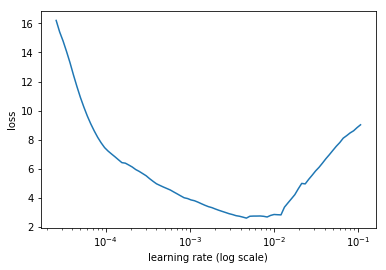

In [54]:
m.sched.plot()

In [55]:
lr = 1e-4 #0.0005

In [56]:
m.fit(lr, 1, cycle_len = 3, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      1.316462   0.113884   0.314031  
    1      0.141893   0.114452   0.297299                                                                              
    2      0.078019   0.101213   0.281771                                                                              



[array([0.10121]), 0.28177103857529096]

In [57]:
m.save("houseprices_3E")

In [58]:
m.load("houseprices_3E")

In [59]:
m.fit(lr, 2, cycle_len = 3, metrics=[exp_rmse], cycle_mult = 2)

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.447571   0.250168   0.480928  
    1      0.138161   0.075017   0.249889                                                                              
    2      0.095308   0.069214   0.234228                                                                              
    3      0.075737   0.100629   0.275805                                                                              
    4      0.194769   0.114512   0.272699                                                                              
    5      0.093086   0.067712   0.218179                                                                              
    6      0.068544   0.074229   0.213741                                                                              
    7      0.058984   0.064447   0.203643                                                                           

[array([0.06141]), 0.19894163511619845]

In [60]:
m.save("houseprices_8E") 

In [61]:
m.load("houseprices_8E")

In [62]:
m.fit(lr, 2, metrics=[exp_rmse], cycle_len = 3, cycle_mult = 2)

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.073808   0.070356   0.244139  
    1      0.080266   0.07214    0.228619                                                                              
    2      0.062146   0.056182   0.198899                                                                              
    3      0.094003   0.142783   0.335601                                                                              
    4      0.179197   0.10688    0.256698                                                                              
    5      0.100781   0.041308   0.179802                                                                              
    6      0.112774   0.045137   0.181813                                                                              
    7      0.030183   0.036895   0.171203                                                                           

[array([0.03953]), 0.17400208796690028]

In [63]:
m.save("forecast_2_ER")

In [78]:
m.load("forecast_2_ER")

In [65]:
m.fit(lr, 2, metrics=[exp_rmse], cycle_len = 5, cycle_mult = 2)

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.106534   0.081335   0.247167  
    1      0.215552   0.105774   0.248275                                                                              
    2      0.120705   0.065959   0.191253                                                                              
    3      0.06067    0.05119    0.176985                                                                              
    4      0.048192   0.049401   0.174974                                                                              
    5      0.050694   0.062033   0.212131                                                                              
    6      0.056155   0.072877   0.202717                                                                              
    7      0.115152   0.077856   0.208221                                                                           

[array([0.03585]), 0.16251861301032777]

In [66]:
m.save("forecast_3_ER")

In [67]:
m.load("forecast_3_ER")

In [68]:
m.fit(lr, 3, metrics=[exp_rmse], cycle_len = 4, cycle_mult = 2)

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.053657   0.054305   0.210893  
    1      0.054472   0.055936   0.211309                                                                              
    2      0.026962   0.04328    0.17553                                                                               
    3      0.014537   0.040215   0.169381                                                                              
    4      0.025619   0.038223   0.184389                                                                              
    5      0.046688   0.050607   0.191421                                                                              
    6      0.134801   0.060756   0.219581                                                                              
    7      0.039628   0.034644   0.167197                                                                           

[array([0.03684]), 0.15861024475216834]

# Test Set

In [79]:
x,y=m.predict_with_targs()
x = torch.from_numpy(x)
y = torch.from_numpy(y)
exp_rmse(x,y)

#pred_test=m.predict(True)

0.1988310126074331

In [80]:
log_preds = m.predict(True)

In [81]:
log_preds

array([[11.45782],
       [13.01759],
       [12.16347],
       ...,
       [12.11827],
       [11.5121 ],
       [12.26967]], dtype=float32)

In [82]:
log_test = np.exp(log_preds)

In [83]:
log_test

array([[ 94638.53 ],
       [450263.25 ],
       [191658.11 ],
       ...,
       [183187.78 ],
       [ 99917.125],
       [213132.55 ]], dtype=float32)

In [84]:
test['SalePrice'] = log_test

In [85]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,SoldDay,SoldDayofweek,SoldDayofyear,SoldIs_month_end,SoldIs_month_start,SoldIs_quarter_end,SoldIs_quarter_start,SoldIs_year_end,SoldIs_year_start,SoldElapsed
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,Inside,...,1,1,152,False,True,False,False,False,False,1275350400
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,Corner,...,1,1,152,False,True,False,False,False,False,1275350400
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,Inside,...,1,0,60,False,True,False,False,False,False,1267401600
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,Inside,...,1,1,152,False,True,False,False,False,False,1275350400
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,Inside,...,1,4,1,False,True,False,True,False,True,1262304000


In [86]:
csv_fn=f'{PATH}submission.csv'

test[['Id','SalePrice']].to_csv(csv_fn, index=False)

In [87]:
test[['Id','SalePrice']]

,Id,SalePrice
0,1461,94638.531250
1,1462,450263.250000
2,1463,191658.109375
3,1464,215193.937500
4,1465,167551.015625
5,1466,193588.406250
6,1467,171648.578125
7,1468,168585.484375
8,1469,176501.765625
9,1470,135471.937500
